In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings("ignore") 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-datta/students_data.csv


In [3]:
df = pd.read_csv("/kaggle/input/students-datta/students_data.csv")
df.head(3)

,Oliver Thompson,Harvard University,2,Unnamed: 3
0,Emma Johnson,Stanford University,3.82,NaN
1,Liam Smith,Massachusetts Institute of Technology (MIT),3.6,NaN
2,Olivia Brown,University of Cambridge,2.93,NaN


In [4]:
columns_n=['Name', 'University', 'CGPA','none']
df.columns = columns_n

In [5]:
df

,Name,University,CGPA,none
0,Emma Johnson,Stanford University,3.82,NaN
1,Liam Smith,Massachusetts Institute of Technology (MIT),3.6,NaN
2,Olivia Brown,University of Cambridge,2.93,NaN
3,Noah Davis,University of Oxford,3.3,NaN
4,Ava Wilson,California Institute of Technology (Caltech),2.95,NaN
...,...,...,...,...
594,NaN,NaN,NaN,NaN
595,NaN,NaN,NaN,NaN
596,NaN,NaN,NaN,NaN
597,NaN,NaN,NaN,NaN


In [6]:
df = df.drop('none', axis=1)

In [7]:
df

,Name,University,CGPA
0,Emma Johnson,Stanford University,3.82
1,Liam Smith,Massachusetts Institute of Technology (MIT),3.6
2,Olivia Brown,University of Cambridge,2.93
3,Noah Davis,University of Oxford,3.3
4,Ava Wilson,California Institute of Technology (Caltech),2.95
...,...,...,...
594,NaN,NaN,NaN
595,NaN,NaN,NaN
596,NaN,NaN,NaN
597,NaN,NaN,NaN


In [8]:
df['CGPA'].unique()

array(['3.82', '3.6', '2.93', '3.3', '2.95', '2.5', '2.8', '2.45', '2.9',
       '3.01', '3.68', 'Annual ', '3.33', '2.33',
       '3.08(updated after 4 semester).', '2.76', nan, '2', '3.37',
       '2.52', '3.1', '3.4', '3.53', '3.52', '3.2', '2.7', '2.83', '2.86',
       '3.08', '3.47', '3', '3.7', '2.58', '3.51', '3.25', '3.81', '2.97',
       '3.61', '2.94', '3.23', '2.92', '7.5', '2.51', '2.61', '3.28',
       '2.4', '3.26', '3.13', '2.6', '2.2', '3.18', '3.5', '2.96', '3.06',
       '3.58', '3.21 (6th semester completed)', '2.63', '3.12', '3.318',
       '3.45', '2.64', '2.3', '3.54', '2.84', '2.71', '3.78', '2.6/4',
       '3.07', '3.55', '2.48', '3.94', '3.04', '2.73', '3.05', '3.66',
       '3.74', '3.17', '2.78', '2.75', '3.95', '3.64', '3.88', '3.41',
       '3.93', '3.36', '2.89', '3.65', '2.74', '3.09', '3.24', '3.79',
       '4', '3.34', '3.72', '3.49', '2.57', '3.85', '2.87', '3.48',
       '3.43', '3.93/4', '3.44', '3.39', '3.59', '3.69', '3.96', '3.86',
       '3.57', 

In [9]:
df['CGPA'] = df['CGPA'].astype(str)  # Convert all values to strings
df['CGPA'] = df['CGPA'].str.extract(r'(\d+\.\d+)').astype(float)  # Extract and convert to float


In [10]:
df=df.dropna(subset=['CGPA'])
df

,Name,University,CGPA
0,Emma Johnson,Stanford University,3.82
1,Liam Smith,Massachusetts Institute of Technology (MIT),3.60
2,Olivia Brown,University of Cambridge,2.93
3,Noah Davis,University of Oxford,3.30
4,Ava Wilson,California Institute of Technology (Caltech),2.95
...,...,...,...
294,Max Turner,University of Amsterdam,3.09
295,Brooklyn Wilson,University of Copenhagen,3.23
296,Colton Carter,"University of California, Santa Barbara (UCSB)",2.20
297,Gabriella Lee,King's College London,2.50


In [11]:
df = df.loc[df['CGPA'] <= 4]
top_uni = df.groupby('University')['CGPA'].mean().sort_values(ascending=False).head(5)
top_uni

University
University of Toronto                                        3.525
Massachusetts Institute of Technology (MIT)                  3.474
University of Southern California (USC)                      3.455
University of Bristol                                        3.440
Swiss Federal Institute of Technology Zurich (ETH Zurich)    3.410
Name: CGPA, dtype: float64

In [12]:
df['Name_Length'] = df['Name'].str.len()

# Calculate the correlation between 'CGPA' and 'Name_Length'
correlation = df['CGPA'].corr(df['Name_Length'])

# Print the correlation value
print("Correlation between CGPA and Name Length:", correlation)

Correlation between CGPA and Name Length: 0.021044223047317186


In [13]:
c_uni = df.groupby('University')['CGPA'].describe()
c_uni

,count,mean,std,min,25%,50%,75%,max
University,,,,,,,,
California Institute of Technology (Caltech),3.0,2.996667,0.411987,2.61,2.7800,2.950,3.1900,3.43
Columbia University,6.0,3.006667,0.344654,2.70,2.8075,2.845,3.1600,3.59
Cornell University,6.0,3.141667,0.549014,2.24,2.8675,3.400,3.4450,3.66
Harvard University,4.0,2.965000,0.450074,2.40,2.8125,2.980,3.1325,3.50
Imperial College London,6.0,3.138333,0.381650,2.70,2.9275,3.055,3.2725,3.79
...,...,...,...,...,...,...,...,...
University of Washington,6.0,3.038333,0.352387,2.50,2.9225,3.090,3.1000,3.58
University of Western Australia,3.0,3.110000,0.359305,2.70,2.9800,3.260,3.3150,3.37
University of Wisconsin-Madison,6.0,2.951667,0.373117,2.40,2.7700,2.925,3.2375,3.40


In [15]:

from sklearn.model_selection import train_test_split
# Assuming you have already loaded the data into the 'df' DataFrame

# Filter out non-string values from the 'Name' column
df = df[df['Name'].apply(lambda x: isinstance(x, str))]

x = df['Name'].apply(len).values.reshape(-1, 1)
y = df['CGPA'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)


In [18]:
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(x_train,y_train)

LinearRegression()

In [25]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
y_pred = mod.predict(x_test)

In [27]:
mse=mean_squared_error(y_test,y_pred)
mse

0.18228806353414384

In [41]:
t=3.5
uni=df[df['CGPA']>t]['University'].value_counts().idxmax()
uni

'University of British Columbia'

In [42]:

outliers=df.groupby('University')['CGPA'].apply(lambda x: x[x.between(*x.quantile([0.25,0.75]).values)])
outliers

University                                       
California Institute of Technology (Caltech)  4      2.95
Columbia University                           106    2.86
                                              185    2.83
Cornell University                            18     3.37
                                              187    3.43
                                                     ... 
University of Western Australia               59     3.26
University of Wisconsin-Madison               121    3.05
                                              268    2.80
University of Zurich                          245    2.69
Yale University                               108    3.07
Name: CGPA, Length: 105, dtype: float64

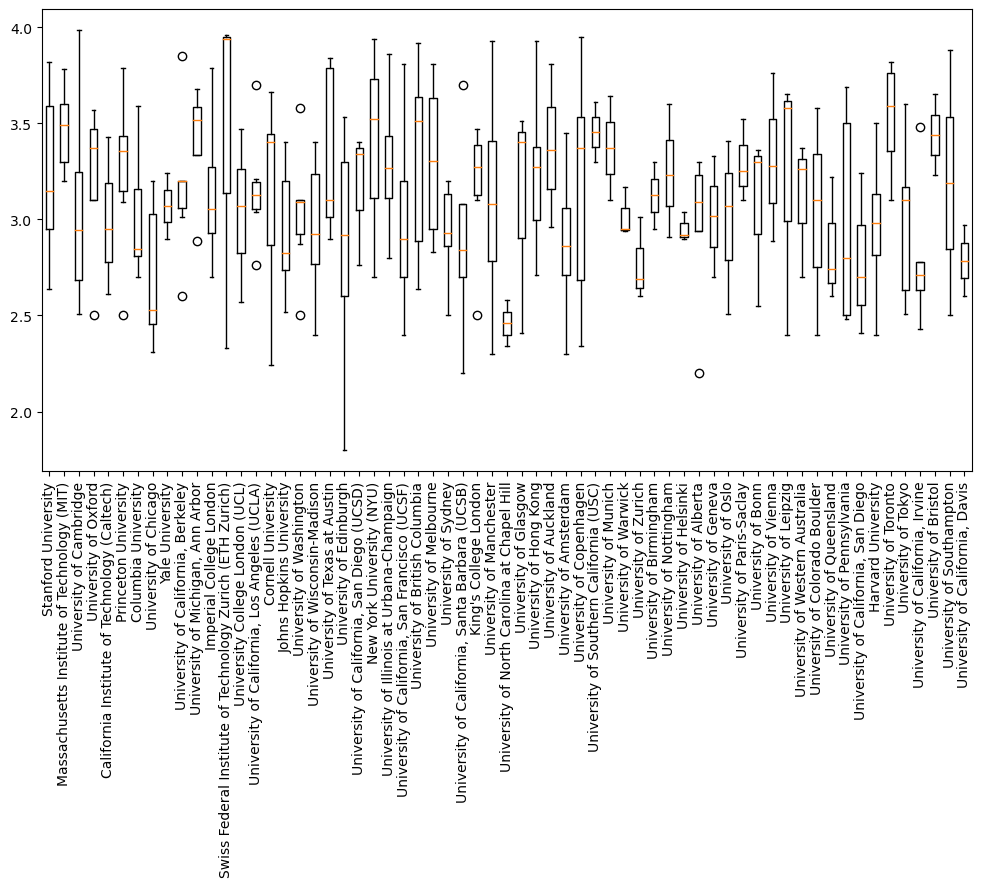

In [43]:
# box plot for cgpa stats
data_plot = [df[df.University == uni]['CGPA'] for uni in df.University.unique()]
plt.figure(figsize=(12, 6))
plt.boxplot(data_plot, labels=df.University.unique())
plt.xticks(rotation=90)
plt.show()


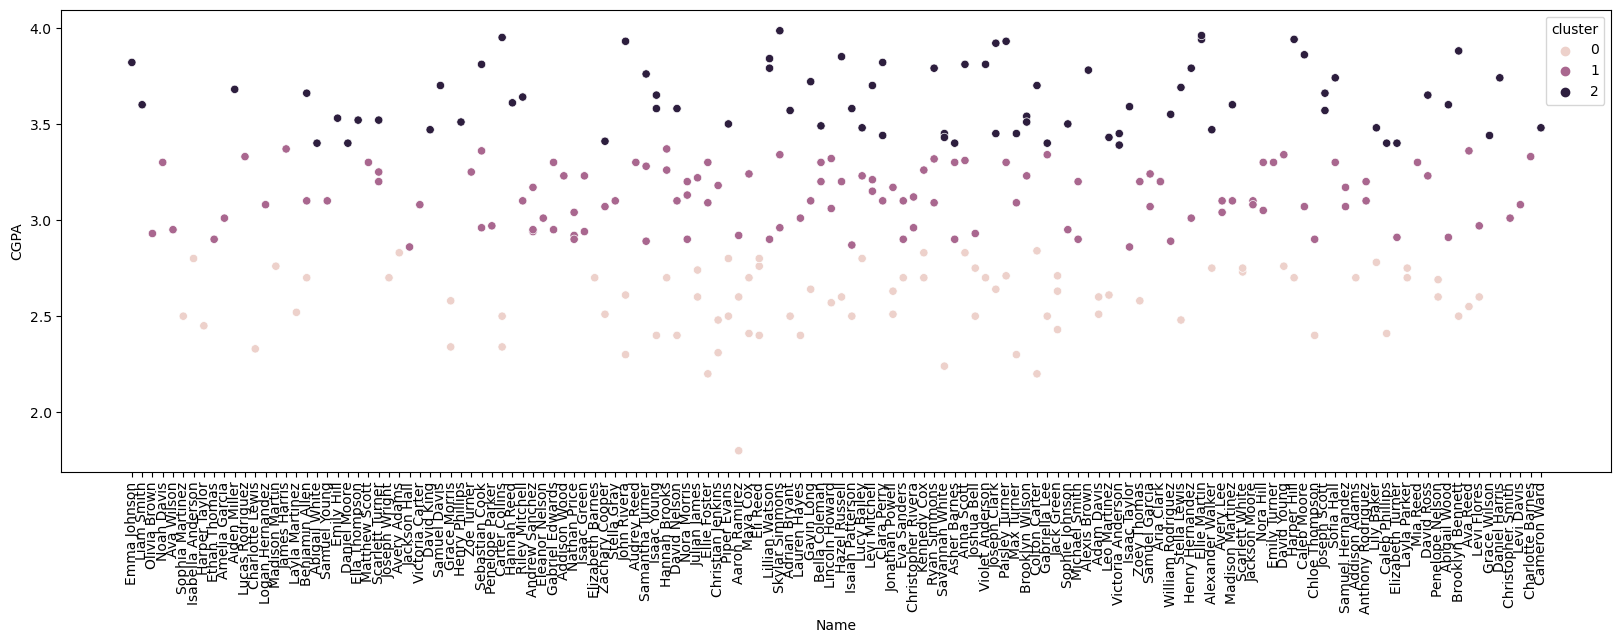

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
k=df[['CGPA']]
kmean=KMeans(n_clusters=3,random_state=42)
df['cluster']=kmean.fit_predict(k)
plt.figure(figsize=(20,6))
sns.scatterplot(x='Name',y='CGPA',hue='cluster',data=df)
plt.xticks(rotation=90)
plt.show()


In [45]:
avg=df.groupby('cluster')['CGPA'].mean()
avg

cluster
0    2.575062
1    3.119293
2    3.632434
Name: CGPA, dtype: float64

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have already loaded the data into the 'df' DataFrame

# Filter out non-string values from the 'Name' column
df = df[df['Name'].apply(lambda x: isinstance(x, str))]

# Select the features (independent variables)
features = df[['CGPA']]

# Select the target variable (dependent variable)
target = df['University']  # Replace 'University' with the actual target column name

# Split the data into training and testing sets for both features and target
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict the target values using the model
y_pred = model.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.010416666666666666


In [48]:
avg2=df['CGPA'].mean()
avg2


3.1006703296703293

In [50]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'University' column using label encoding
encoder = LabelEncoder()
df['University_encoded'] = encoder.fit_transform(df['University'])

# Task 1: Build a Regression Model for CGPA Prediction
x_regression = df[['University_encoded']]
y_regression = df['CGPA']
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_regression, y_regression, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(x_train_reg, y_train_reg)
y_pred_reg = regression_model.predict(x_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Regression Model MSE:", mse)


Regression Model MSE: 0.18061559865339447


In [51]:
# Task 3: Check for Missing or Erroneous CGPA Values
missing_cgpa = df['CGPA'].isna().sum()
print("Missing CGPA Values:", missing_cgpa)

Missing CGPA Values: 0


In [54]:
from sklearn.cluster import AgglomerativeClustering

x_clustering = df[['CGPA']]
clustering_model = AgglomerativeClustering(n_clusters=3)
df['cluster'] = clustering_model.fit_predict(x_clustering)


In [55]:
# Task 7: Build a Classification Model for University Prediction
x_classification = df[['CGPA', 'Name_Length']]
y_classification = df['University']
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_classification, y_classification, test_size=0.2, random_state=42)
classification_model = DecisionTreeClassifier(random_state=42)
classification_model.fit(x_train_class, y_train_class)
y_pred_class = classification_model.predict(x_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Classification Model Accuracy:", accuracy)


Classification Model Accuracy: 0.03636363636363636


In [56]:
correlations = df.groupby('University')[['Name_Length', 'CGPA']].corr().loc[:, 'Name_Length']
print("Correlation between Name Length and CGPA within Each University:\n", correlations)


Correlation between Name Length and CGPA within Each University:
 University                                               
California Institute of Technology (Caltech)  Name_Length    1.000000
                                              CGPA           0.098097
Columbia University                           Name_Length    1.000000
                                              CGPA          -0.199380
Cornell University                            Name_Length    1.000000
                                                               ...   
University of Wisconsin-Madison               CGPA           0.742487
University of Zurich                          Name_Length    1.000000
                                              CGPA          -0.977951
Yale University                               Name_Length    1.000000
                                              CGPA           0.866025
Name: Name_Length, Length: 126, dtype: float64


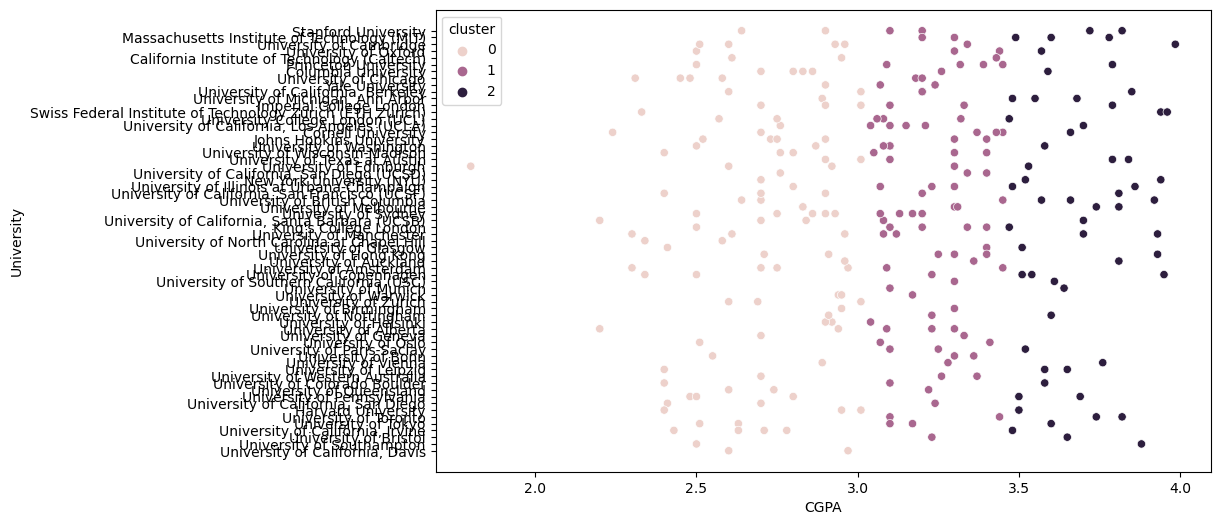

In [57]:

# Visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CGPA', y='University', hue='cluster', data=df)
plt.show()